In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from utlis import rm_units_and_conv_int
import utlis

import importlib
importlib.reload(utlis)

<module 'utlis' from 'd:\\1. Projects\\DNA\\Portfolio\\car_market_analysis\\utlis.py'>

### **Merging all datasets into one**

Make sure to uncomment cells in this section in order to create a dataset that contains all data from data scraping.

In [390]:
from os import listdir

PATH = 'data_scraping/data/datasets/'

# Concatenating all datasets
for i, ds in enumerate(listdir(PATH)):
    if i == 0:
        data = pd.read_csv(f'{PATH}{ds}')
    else:
        data = pd.concat([data, pd.read_csv(f'{PATH}{ds}')])

print(data.shape)
data.head()

(134049, 19)


,Marka pojazdu,Model pojazdu,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Spalanie W Mieście,Typ nadwozia,Liczba drzwi,Liczba miejsc,Kolor,Kraj pochodzenia,Bezwypadkowy,Serwisowany w ASO,Stan,Cena
0,Audi,SQ7,2017.0,142 800 km,3 956 cm3,Diesel,435 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,7.0,Szary,Polska,Tak,Tak,Używane,269 000 PLN
1,Audi,A3,2010.0,236 000 km,1 395 cm3,Benzyna,125 KM,Manualna,Na przednie koła,NaN,Kompakt,5.0,5.0,Czarny,NaN,Tak,Tak,Używane,29 900 PLN
2,Audi,A4,2018.0,84 500 km,1 968 cm3,Diesel,190 KM,Automatyczna,4x4 (stały),5 l/100km,Kombi,5.0,5.0,Szary,NaN,NaN,NaN,Używane,60 000 PLN
3,Audi,Q5,2018.0,38 000 km,1 984 cm3,Benzyna,252 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,5.0,Szary,NaN,NaN,NaN,Używane,75 000 PLN
4,Audi,A7,2016.0,74 885 km,2 995 cm3,Benzyna,333 KM,Automatyczna,4x4 (stały),10 l/100km,Kompakt,5.0,5.0,Biały,NaN,NaN,NaN,Używane,75 000 PLN


In [391]:
# Translating column names from polish to english
colnames = {
    'Marka pojazdu': 'brand',
    'Model pojazdu': 'model',
    'Rok produkcji': 'year',
    'Przebieg': 'mileage',
    'Pojemność skokowa': 'engine_capacity',
    'Rodzaj paliwa': 'fuel',
    'Moc': 'power',
    'Skrzynia biegów': 'gearbox',
    'Napęd': 'drive',
    'Spalanie W Mieście': 'city_fuel_consumption',
    'Typ nadwozia': 'body',
    'Liczba drzwi': 'doors',
    'Liczba miejsc': 'seats',
    'Kolor': 'color',
    'Kraj pochodzenia': 'origin_country',
    'Bezwypadkowy': 'accident_free',
    'Serwisowany w ASO': 'serviced_at_ASO',
    'Stan': 'condition',
    'Cena': 'price'
}
data.rename(columns=colnames, inplace=True)

data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142 800 km,3 956 cm3,Diesel,435 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,7.0,Szary,Polska,Tak,Tak,Używane,269 000 PLN
1,Audi,A3,2010.0,236 000 km,1 395 cm3,Benzyna,125 KM,Manualna,Na przednie koła,NaN,Kompakt,5.0,5.0,Czarny,NaN,Tak,Tak,Używane,29 900 PLN
2,Audi,A4,2018.0,84 500 km,1 968 cm3,Diesel,190 KM,Automatyczna,4x4 (stały),5 l/100km,Kombi,5.0,5.0,Szary,NaN,NaN,NaN,Używane,60 000 PLN
3,Audi,Q5,2018.0,38 000 km,1 984 cm3,Benzyna,252 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,5.0,Szary,NaN,NaN,NaN,Używane,75 000 PLN
4,Audi,A7,2016.0,74 885 km,2 995 cm3,Benzyna,333 KM,Automatyczna,4x4 (stały),10 l/100km,Kompakt,5.0,5.0,Biały,NaN,NaN,NaN,Używane,75 000 PLN


In [392]:
# Save all data in one file
data.to_csv('data_scraping/data/all_data.csv', index=False)

# **Data cleaning**

In [393]:
data = pd.read_csv('data_scraping/data/all_data.csv')
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142 800 km,3 956 cm3,Diesel,435 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,7.0,Szary,Polska,Tak,Tak,Używane,269 000 PLN
1,Audi,A3,2010.0,236 000 km,1 395 cm3,Benzyna,125 KM,Manualna,Na przednie koła,NaN,Kompakt,5.0,5.0,Czarny,NaN,Tak,Tak,Używane,29 900 PLN
2,Audi,A4,2018.0,84 500 km,1 968 cm3,Diesel,190 KM,Automatyczna,4x4 (stały),5 l/100km,Kombi,5.0,5.0,Szary,NaN,NaN,NaN,Używane,60 000 PLN
3,Audi,Q5,2018.0,38 000 km,1 984 cm3,Benzyna,252 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,5.0,Szary,NaN,NaN,NaN,Używane,75 000 PLN
4,Audi,A7,2016.0,74 885 km,2 995 cm3,Benzyna,333 KM,Automatyczna,4x4 (stały),10 l/100km,Kompakt,5.0,5.0,Biały,NaN,NaN,NaN,Używane,75 000 PLN


In [394]:
data.shape

(134049, 19)

This dataset comprises a vast collection of 134 049 observations specifically centered around cars. With 18 informative columns, it offers a diverse range of details pertaining to each vehicle. These encompass essential information such as the brand, model, production year, mileage, and fuel type. 

## **Missing values**


In [395]:
# How many missing values are there in each column
na_count = data.isna().sum()
na_precentage = (na_count / data.shape[0] * 100).round(2)

na_df = pd.DataFrame({'na_count': na_count, 'na_precentage': na_precentage})
na_df.sort_values(by='na_precentage', ascending=False)

,na_count,na_precentage
serviced_at_ASO,73515,54.84
accident_free,58603,43.72
city_fuel_consumption,54864,40.93
origin_country,45699,34.09
drive,17584,13.12
seats,8407,6.27
engine_capacity,2441,1.82
mileage,1093,0.82
doors,735,0.55
power,83,0.06


In this dataset, a notable observation is that the majority of columns contain missing values. However, an encouraging aspect is that the columns with missing values appear to be of lesser significance (such as whether the car was serviced at ASO, its accident-free status, and city fuel consumption). On the other hand, the essential data elements, including price, model, brand, and production year, exhibit minimal or no missing values at all. This characteristic suggests that the crucial information crucial for analysis is largely intact, allowing for comprehensive examination and insights into the dataset.

In [396]:
# There is one row with majority of values missing, so I filtered it out. It may be caused by some error during scraping
data[data['brand'].isna()]

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
66873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Używane,55 900 PLN


In [397]:
data = data[data['brand'].notna()]

## **Data types**

In [398]:
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142 800 km,3 956 cm3,Diesel,435 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,7.0,Szary,Polska,Tak,Tak,Używane,269 000 PLN
1,Audi,A3,2010.0,236 000 km,1 395 cm3,Benzyna,125 KM,Manualna,Na przednie koła,NaN,Kompakt,5.0,5.0,Czarny,NaN,Tak,Tak,Używane,29 900 PLN
2,Audi,A4,2018.0,84 500 km,1 968 cm3,Diesel,190 KM,Automatyczna,4x4 (stały),5 l/100km,Kombi,5.0,5.0,Szary,NaN,NaN,NaN,Używane,60 000 PLN
3,Audi,Q5,2018.0,38 000 km,1 984 cm3,Benzyna,252 KM,Automatyczna,4x4 (stały),8 l/100km,SUV,5.0,5.0,Szary,NaN,NaN,NaN,Używane,75 000 PLN
4,Audi,A7,2016.0,74 885 km,2 995 cm3,Benzyna,333 KM,Automatyczna,4x4 (stały),10 l/100km,Kompakt,5.0,5.0,Biały,NaN,NaN,NaN,Używane,75 000 PLN


In [399]:
data.dtypes

brand                     object
model                     object
year                     float64
mileage                   object
engine_capacity           object
fuel                      object
power                     object
gearbox                   object
drive                     object
city_fuel_consumption     object
body                      object
doors                    float64
seats                    float64
color                     object
origin_country            object
accident_free             object
serviced_at_ASO           object
condition                 object
price                     object
dtype: object

The dataset contains a few data type errors that need to be addressed.  
Because there are missing values in the dataset I convert all numeric columns to float.
* **mileage** should be `float`
* **engine_capacity** should be `float`
* **power** should be `float`
* **city_fuel_consumption** should be `float`
* **price** should be `float`

### **mileage** 

In [400]:
data['mileage'].head()

0    142 800 km
1    236 000 km
2     84 500 km
3     38 000 km
4     74 885 km
Name: mileage, dtype: object

In [401]:
data['mileage'] = utlis.rm_units_and_conv_dtype(data['mileage'], 'km', 'float')

data['mileage'].head()

0    142800.0
1    236000.0
2     84500.0
3     38000.0
4     74885.0
Name: mileage, dtype: float64

### **engine_capacity** 

In [402]:
data['engine_capacity'].head()

0    3 956 cm3
1    1 395 cm3
2    1 968 cm3
3    1 984 cm3
4    2 995 cm3
Name: engine_capacity, dtype: object

In [403]:
data['engine_capacity'] = utlis.rm_units_and_conv_dtype(data['engine_capacity'], 'cm3', 'float')

data['engine_capacity'].head()

0    3956.0
1    1395.0
2    1968.0
3    1984.0
4    2995.0
Name: engine_capacity, dtype: float64

### **power** 

In [404]:
data['power'].head()

0    435 KM
1    125 KM
2    190 KM
3    252 KM
4    333 KM
Name: power, dtype: object

In [405]:
data['power'] = utlis.rm_units_and_conv_dtype(data['power'], 'KM', 'float')

data['power'].head()

0    435.0
1    125.0
2    190.0
3    252.0
4    333.0
Name: power, dtype: float64

### **city_fuel_consumption** 

In [406]:
data['city_fuel_consumption'].head()

0     8 l/100km
1           NaN
2     5 l/100km
3     8 l/100km
4    10 l/100km
Name: city_fuel_consumption, dtype: object

In [407]:
data['city_fuel_consumption'] = utlis.rm_units_and_conv_dtype(data['city_fuel_consumption'], 'l/100km', 'float')

data['city_fuel_consumption'].head()

0     8.0
1     NaN
2     5.0
3     8.0
4    10.0
Name: city_fuel_consumption, dtype: float64

### **price** 

In [408]:
data['price'].head()

0    269 000        PLN
1     29 900        PLN
2     60 000        PLN
3     75 000        PLN
4     75 000        PLN
Name: price, dtype: object

In [409]:
# There are some prices with "PLN" and some with "EUR", so for this column different approach is needed

# Extracting the value and currency from the price column
data['value'] = data['price'].map(lambda x: float(''.join(x.split()[:-1]).replace(',', '.')))
data['currency'] = data['price'].map(lambda x: x.split()[-1])

data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,...,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price,value,currency
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatyczna,4x4 (stały),8.0,...,5.0,7.0,Szary,Polska,Tak,Tak,Używane,269 000 PLN,269000.0,PLN
1,Audi,A3,2010.0,236000.0,1395.0,Benzyna,125.0,Manualna,Na przednie koła,NaN,...,5.0,5.0,Czarny,NaN,Tak,Tak,Używane,29 900 PLN,29900.0,PLN
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatyczna,4x4 (stały),5.0,...,5.0,5.0,Szary,NaN,NaN,NaN,Używane,60 000 PLN,60000.0,PLN
3,Audi,Q5,2018.0,38000.0,1984.0,Benzyna,252.0,Automatyczna,4x4 (stały),8.0,...,5.0,5.0,Szary,NaN,NaN,NaN,Używane,75 000 PLN,75000.0,PLN
4,Audi,A7,2016.0,74885.0,2995.0,Benzyna,333.0,Automatyczna,4x4 (stały),10.0,...,5.0,5.0,Biały,NaN,NaN,NaN,Używane,75 000 PLN,75000.0,PLN


In [410]:
# Check the rows with EUR currency
eur_price = data[data['currency'] == 'EUR']

print(f'There are {len(eur_price)} rows with EUR currency.')
eur_price.head()

There are 224 rows with EUR currency.


,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,...,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price,value,currency
1416,Audi,RS e-tron GT,2023.0,10.0,NaN,Elektryczny,598.0,Automatyczna,4x4 (stały),NaN,...,4.0,NaN,Czarny,NaN,NaN,NaN,Używane,69 000 EUR,69000.0,EUR
1431,Audi,RS e-tron GT,2023.0,15.0,NaN,Elektryczny,598.0,Automatyczna,4x4 (stały),NaN,...,4.0,NaN,Zielony,NaN,NaN,NaN,Używane,70 000 EUR,70000.0,EUR
3769,Audi,A8,2018.0,114699.0,2967.0,Diesel,286.0,Automatyczna,4x4 (stały),8.0,...,4.0,5.0,Czarny,Niemcy,NaN,NaN,Używane,47 000 EUR,47000.0,EUR
6764,Audi,A4,2020.0,22000.0,1968.0,Diesel,190.0,Automatyczna,4x4 (stały),5.0,...,5.0,5.0,Inny kolor,NaN,NaN,Tak,Używane,10 500 EUR,10500.0,EUR
6785,Audi,RS3,2022.0,6500.0,2480.0,Benzyna,400.0,Automatyczna,NaN,11.1,...,4.0,5.0,Szary,NaN,NaN,NaN,Używane,55 000 EUR,55000.0,EUR


In [411]:
# Convert EUR to PLN
data.loc[data['currency'] == 'EUR', 'value'] *= 4.45

In [412]:
# Drop no longer needed columns
data = data.drop(['price', 'currency'], axis='columns')

data = data.rename(columns={"value": "price"})

data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatyczna,4x4 (stały),8.0,SUV,5.0,7.0,Szary,Polska,Tak,Tak,Używane,269000.0
1,Audi,A3,2010.0,236000.0,1395.0,Benzyna,125.0,Manualna,Na przednie koła,NaN,Kompakt,5.0,5.0,Czarny,NaN,Tak,Tak,Używane,29900.0
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatyczna,4x4 (stały),5.0,Kombi,5.0,5.0,Szary,NaN,NaN,NaN,Używane,60000.0
3,Audi,Q5,2018.0,38000.0,1984.0,Benzyna,252.0,Automatyczna,4x4 (stały),8.0,SUV,5.0,5.0,Szary,NaN,NaN,NaN,Używane,75000.0
4,Audi,A7,2016.0,74885.0,2995.0,Benzyna,333.0,Automatyczna,4x4 (stały),10.0,Kompakt,5.0,5.0,Biały,NaN,NaN,NaN,Używane,75000.0


## **Categorical columns**

To ensure robust analysis, a minimum of 50 observations is set as a benchmark for each category. Any rows that fall short of this criterion will be filtered out, guaranteeing the reliability of the dataset.

Categorical columns in the dataset:
* brand
* model
* fuel_type
* gearbox
* drive
* body_type
* doors
* seats
* color
* origin_country
* accident_free
* serviced_at_ASO
* condition

In [413]:
data.head()

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
0,Audi,SQ7,2017.0,142800.0,3956.0,Diesel,435.0,Automatyczna,4x4 (stały),8.0,SUV,5.0,7.0,Szary,Polska,Tak,Tak,Używane,269000.0
1,Audi,A3,2010.0,236000.0,1395.0,Benzyna,125.0,Manualna,Na przednie koła,NaN,Kompakt,5.0,5.0,Czarny,NaN,Tak,Tak,Używane,29900.0
2,Audi,A4,2018.0,84500.0,1968.0,Diesel,190.0,Automatyczna,4x4 (stały),5.0,Kombi,5.0,5.0,Szary,NaN,NaN,NaN,Używane,60000.0
3,Audi,Q5,2018.0,38000.0,1984.0,Benzyna,252.0,Automatyczna,4x4 (stały),8.0,SUV,5.0,5.0,Szary,NaN,NaN,NaN,Używane,75000.0
4,Audi,A7,2016.0,74885.0,2995.0,Benzyna,333.0,Automatyczna,4x4 (stały),10.0,Kompakt,5.0,5.0,Biały,NaN,NaN,NaN,Używane,75000.0


### **brand**

In [414]:
data['brand'].value_counts()

brand
BMW              17720
Audi             17579
Volkswagen       17505
Ford             15370
Opel             14517
Mercedes-Benz    13599
Renault          10258
Toyota            9833
Skoda             9510
Peugeot           8154
Seat                 2
Lancia               1
Name: count, dtype: int64

In [415]:
# Brands Seat and Lancia should not be in the dataset, so I drop them
data = data[~data['brand'].isin(['Seat', 'Lancia'])]

### **model**

In [416]:
data.groupby(['brand', 'model']).size()

brand       model                                                                                 
Audi        100                                                                                        25
            200                                                                                         2
            80                                                                                         65
            90                                                                                          1
            A1                                                                                        206
                                                                                                     ... 
Volkswagen  Touran                                                                                    883
            Transporter                                                                               261
            Vento                                    

In [417]:
value_counts = data['model'].value_counts()
filtered_models = value_counts[value_counts < 50].index
print(f'There are {len(filtered_models)} models with less than 50 offers.')

data = data[~data['model'].isin(filtered_models)]

There are 184 models with less than 50 offers.


### **fuel**

In [418]:
# Translating fuel types from polish to english
translations = {
    'Diesel': 'Diesel',
    'Benzyna': 'Gasoline',
    'Hybryda': 'Hybrid',
    'Benzyna+LPG': 'Gasoline+LPG',
    'Elektryczny': 'Electric',
    'Benzyna+CNG': 'Gasoline+CNG',
    'Wodór': 'Hydrogen',
    'Etanol': 'Ethanol'
}

data['fuel'] = data['fuel'].replace(translations)

In [419]:
data['fuel'].value_counts()

fuel
Diesel          61634
Gasoline        59411
Hybrid           4217
Gasoline+LPG     3953
Electric         2118
Gasoline+CNG       47
Ethanol             1
Name: count, dtype: int64

In [420]:
# What is interesting, there is one car that is fueled by Ethanol
data[data['fuel'] == 'Ethanol']

,brand,model,year,mileage,engine_capacity,fuel,power,gearbox,drive,city_fuel_consumption,body,doors,seats,color,origin_country,accident_free,serviced_at_ASO,condition,price
117486,Volkswagen,ID.5,2023.0,7.0,1395.0,Ethanol,204.0,Automatyczna,Na tylne koła,NaN,SUV,5.0,5.0,Biały,Polska,Tak,NaN,Nowe,258790.0


In [421]:
# Filtering out cars with fuel type that do not meet the benchmark
data = data[~data['fuel'].isin(['Gasoline+CNG', 'Ethanol'])]

### **gearbox**

In [422]:
# Translating gearbox types from polish to english
translations = {
    'Manualna': 'Manual',
    'Automatyczna': 'Automatic',
}

data['gearbox'] = data['gearbox'].replace(translations)

In [423]:
data['gearbox'].value_counts()

gearbox
Manual       71306
Automatic    59973
Name: count, dtype: int64

### **drive**

In [424]:
# Translating drive types from polish to english
translations = {
    'Na przednie koła': 'Front-wheel drive',
    '4x4 (stały)': 'All-wheel drive (permanent)',
    'Na tylne koła': 'Rear-wheel drive',
    '4x4 (dołączany automatycznie)': 'Four-wheel drive (automatic engagement)',
    '4x4 (dołączany ręcznie)': 'Four-wheel drive (manual engagement)'
}

data['drive'] = data['drive'].replace(translations)

In [425]:
data['drive'].value_counts()

drive
Front-wheel drive                          74318
All-wheel drive (permanent)                13539
Rear-wheel drive                           13176
Four-wheel drive (automatic engagement)    12299
Four-wheel drive (manual engagement)         853
Name: count, dtype: int64

### **body**

In [426]:
# Translating body types from polish to english
translations = {
    'Kombi': 'Estate',
    'SUV': 'SUV',
    'Sedan': 'Sedan',
    'Kompakt': 'Compact',
    'Minivan': 'Minivan',
    'Auta miejskie': 'City_car',
    'Coupe': 'Coupe',
    'Auta małe': 'Small_car',
    'Kabriolet': 'Convertible'
}

data['body'] = data['body'].replace(translations)

In [427]:
data['body'].value_counts()

body
Estate         29884
SUV            26222
Sedan          22623
Compact        20876
Minivan        12567
City_car        8201
Coupe           5365
Small_car       3381
Convertible     2214
Name: count, dtype: int64

### **doors**

In [428]:
data['doors'].value_counts()

doors
5.0    102114
4.0     17540
3.0      6068
2.0      4837
6.0        55
Name: count, dtype: int64

### **seats**

In [429]:
data['seats'].value_counts()

seats
5.0    107564
4.0      7265
7.0      4922
2.0      1153
9.0       815
6.0       508
8.0       466
3.0       430
1.0        34
Name: count, dtype: int64

In [430]:
# Filtering out cars number of seats that do not meet the benchmark
data = data[data['seats'] != 1]

### **color**

In [431]:
# Translating colors from polish to english
translations = {
    'Czarny': 'Black',
    'Szary': 'Gray',
    'Biały': 'White',
    'Srebrny': 'Silver',
    'Niebieski': 'Blue',
    'Inny kolor': 'Other_color',
    'Granatowy': 'Navy_blue',
    'Czerwony': 'Red',
    'Brązowy': 'Brown',
    'Zielony': 'Green',
    'Bordowy': 'Burgundy',
    'Złoty': 'Gold',
    'Beżowy': 'Beige',
    'Błękitny': 'Light_blue',
    'Pomarańczowy': 'Orange',
    'Żółty': 'Yellow',
    'Fioletowy': 'Purple'
}

data['color'] = data['color'].replace(translations)

In [432]:
data['color'].value_counts()

color
Black          34102
Gray           21377
White          21050
Silver         18500
Blue            9403
Other_color     5695
Navy_blue       4894
Red             4768
Brown           3031
Green           1942
Burgundy        1522
Gold            1376
Beige           1173
Light_blue      1109
Orange           530
Yellow           469
Purple           358
Name: count, dtype: int64

### **origin_country**

In [433]:
# Translating origin countries from polish to english
translations = {
    'Polska': 'Poland',
    'Niemcy': 'Germany',
    'Francja': 'France',
    'Stany_Zjednoczone': 'United_States',
    'Belgia': 'Belgium',
    'Szwajcaria': 'Switzerland',
    'Holandia': 'Netherlands',
    'Włochy': 'Italy',
    'Szwecja': 'Sweden',
    'Austria': 'Austria',
    'Dania': 'Denmark',
    'Kanada': 'Canada',
    'Japonia': 'Japan',
    'Czechy': 'Czech_Republic',
    'Wielka_Brytania': 'United_Kingdom',
    'Luksemburg': 'Luxembourg',
    'Norwegia': 'Norway',
    'Hiszpania': 'Spain',
    'Inny': 'Other',
    'Finlandia': 'Finland',
    'Słowacja': 'Slovakia',
    'Słowenia': 'Slovenia',
    'Grecja': 'Greece',
    'Litwa': 'Lithuania',
    'Estonia': 'Estonia',
    'Węgry': 'Hungary',
    'Rumunia': 'Romania',
    'Irlandia': 'Ireland',
    'Islandia': 'Iceland',
    'Liechtenstein': 'Liechtenstein',
    'Łotwa': 'Latvia',
    'Rosja': 'Russia',
    'Monako': 'Monaco',
    'Bułgaria': 'Bulgaria',
    'Ukraina': 'Ukraine',
    'Chorwacja': 'Croatia',
    'Turcja': 'Turkey',
    'Korea': 'Korea'
}

data['origin_country'] = data['origin_country'].replace(translations)

In [434]:
data['origin_country'].value_counts()

origin_country
Poland               42241
Germany              27322
France                4411
Stany Zjednoczone     2864
Belgium               2790
Switzerland           1515
Netherlands           1202
Italy                  915
Sweden                 758
Austria                670
Denmark                457
Canada                 426
Japan                  301
Czech_Republic         178
Wielka Brytania        143
Luxembourg             127
Norway                 113
Spain                   89
Other                   73
Finland                 67
Slovakia                32
Slovenia                 6
Greece                   6
Lithuania                5
Estonia                  5
Hungary                  5
Romania                  3
Ireland                  3
Iceland                  3
Liechtenstein            3
Latvia                   2
Russia                   2
Monaco                   1
Bulgaria                 1
Ukraine                  1
Croatia                  1
Turkey       

In [435]:
value_counts = data['origin_country'].value_counts()
filtered_countries = value_counts[value_counts < 50].index
print(f'There are {len(filtered_countries)} countries of origin with less than 50 offers.')

data = data[~data['origin_country'].isin(filtered_countries)]

There are 18 countries of origin with less than 50 offers.


### **accident_free**

In [436]:
# Translating whether the car is accident free from polish to english
data.loc[data['accident_free'] == 'Tak', 'accident_free'] = True

In [437]:
data['accident_free'].value_counts()

accident_free
True    74026
Name: count, dtype: int64

In [438]:
# I will assume that if someone has not marked that the car is accident free, then it is not
data['accident_free'] = data['accident_free'].fillna(False)

In [439]:
data['accident_free'].value_counts()

accident_free
True     74026
False    57192
Name: count, dtype: int64

### **serviced_at_ASO**

In [440]:
# Translating whether the car was serviced at ASO from polish to english
data.loc[data['serviced_at_ASO'] == 'Tak', 'serviced_at_ASO'] = True

In [441]:
data['serviced_at_ASO'].value_counts()

serviced_at_ASO
True    59616
Name: count, dtype: int64

In [442]:
# I will assume that if someone has not marked that the car was serviced at ASO, then it was not
data['serviced_at_ASO'] = data['serviced_at_ASO'].fillna(False)

In [443]:
data['serviced_at_ASO'].value_counts()

serviced_at_ASO
False    71602
True     59616
Name: count, dtype: int64

### **condition**

In [444]:
# Translating car condition from polish to english
translations = {
    'Używane': 'Used',
    'Nowe': 'New'
}

data['condition'] = data['condition'].replace(translations)

In [445]:
data['condition'].value_counts()

condition
Used    119422
New      11796
Name: count, dtype: int64

## **Outliers**

In [446]:
features = ['year', 'mileage', 'engine_capacity', 'power', 'city_fuel_consumption', 'price']

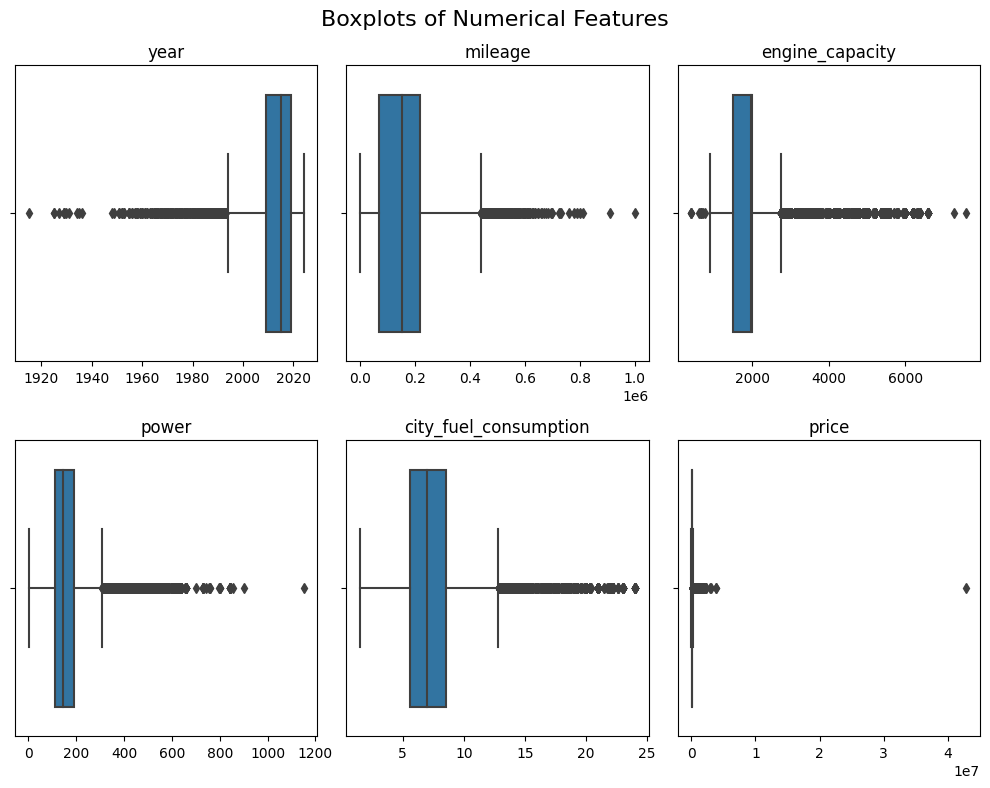

In [447]:
# First, using boxplot I will check the distribution of numerical features

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x=data[feature], ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')

plt.suptitle('Boxplots of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [448]:
data['price'].max()/data['price'].mean()

496.17225316409144

The dataset contains numerous outliers, with each numerical feature exhibiting a few of these exceptional values. Among them, the most striking outlier appears to be situated within the price column, where max value is almost 500x bigger than the average.


In order to deal with outliers, I decided to use **winsorization**.

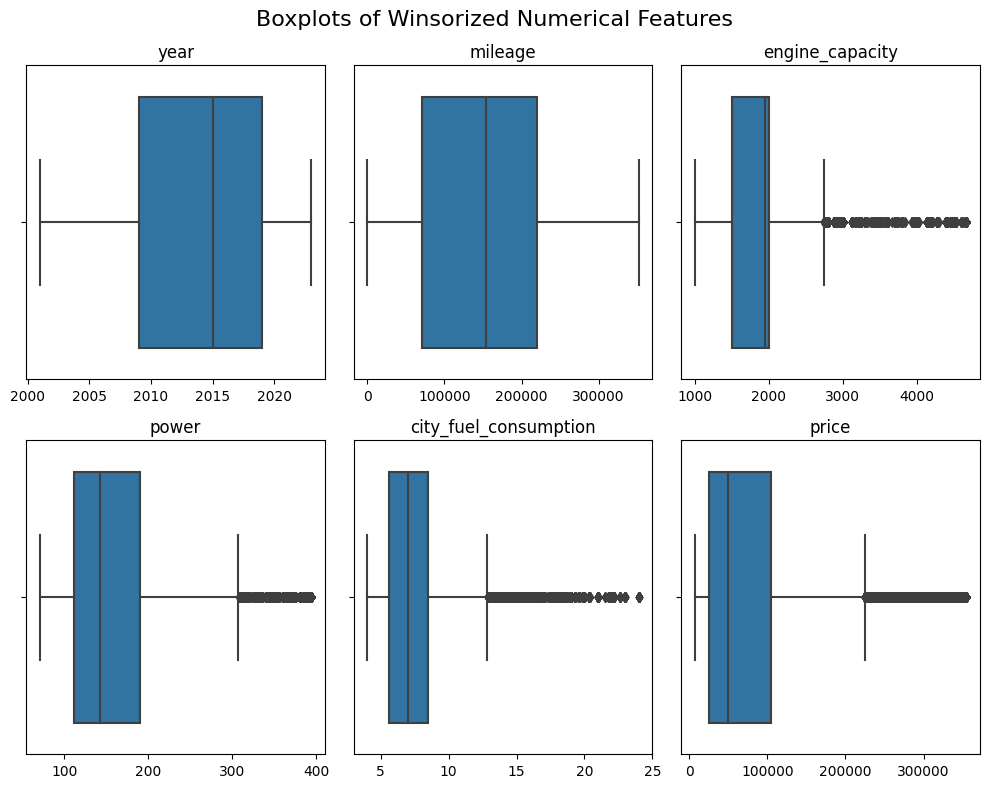

In [449]:
# Distribution of numerical features after winsorization with the benchmark of 2%

from scipy.stats.mstats import winsorize

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x=winsorize(data[feature], limits=[0.03, 0.03]).data, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')

plt.suptitle('Boxplots of Winsorized Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [450]:
for i in features:
    data[i] = winsorize(data[i], limits=[0.03, 0.03]).data

## **Saving cleaned dataset**

In [451]:
data.to_csv('data_scraping/data/all_data_cleaned.csv', index=False)